In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

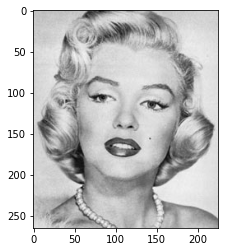

In [23]:
path = 'data/marilyn.bmp'
image = np.array(Image.open(path).convert('L'))
image.shape
plt.imshow(image, cmap=plt.cm.gray)

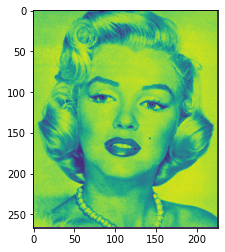

In [24]:
image_padded = np.pad(image, (1, 1), mode='constant')
plt.imshow(image_padded)

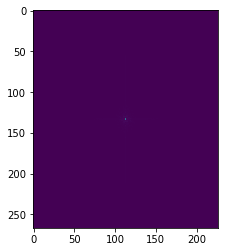

In [25]:
ftimage = np.fft.fft2(image_padded)
ftimage = np.fft.fftshift(ftimage)
plt.imshow(np.abs(ftimage))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


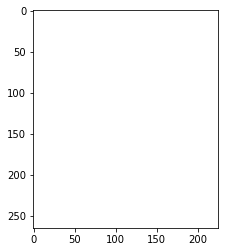

In [19]:
imagep = np.fft.ifft2(ftimage)
plt.imshow(np.abs(imagep))

In [15]:
fq_img = np.fft.fftshift(np.fft.fft2(image))
print(fq_img.shape)
print(fq_img[0:,0:,]) # complex numbers

(265, 225, 3)
[[[   0.          +0.j          112.70297341  -3.14528159j
      0.          +0.j        ]
  [   0.          +0.j          -11.01640014 +43.6631248j
      0.          +0.j        ]
  [   0.          +0.j          -43.72782031 +83.34532884j
      0.          +0.j        ]
  ...
  [   0.          +0.j          -43.72782031 -83.34532884j
      0.          +0.j        ]
  [   0.          +0.j          -11.01640014 -43.6631248j
      0.          +0.j        ]
  [   0.          +0.j          112.70297341  +3.14528159j
      0.          +0.j        ]]

 [[   0.          +0.j         -176.74866608-130.10622211j
      0.          +0.j        ]
  [   0.          +0.j           74.60643105-240.02645503j
      0.          +0.j        ]
  [   0.          +0.j          223.49901377-130.15869714j
      0.          +0.j        ]
  ...
  [   0.          +0.j          223.49901377+130.15869714j
      0.          +0.j        ]
  [   0.          +0.j           74.60643105+240.02645503j
     

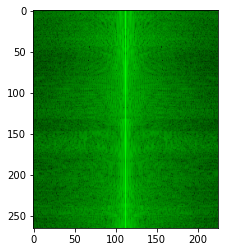

In [16]:
# visualise frequency domain
plt.imshow( np.log(np.abs(fq_img)) / np.log(np.max(np.abs(fq_img))) )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


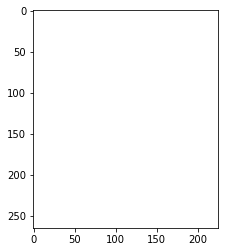

In [12]:
# reconstruct image from frequency
img_recon = np.real(np.fft.ifft2(np.fft.ifftshift(fq_img)))
plt.imshow(img_recon,cmap='gray')